<div style="display: inline-block;">
    <img src="images/nhsa_logo.png" alt="Image" style="text-align: left;">
</div>

# Parent Gauge Data Analysis Project
---
## Final Data Analysis

Final Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
from rich.console import Console
from rich.table import Table

In [3]:
#read the .csv file into dataframe
df = pd.read_csv('../data/sample_data.csv')
#df = pd.read_csv('../data/intv_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/sample_data.csv'

### Compare 1st year of using Parent Gauge results to subsequent years to identify if there is an average increase in rankings after Parent Gauge adoption.- Break up interview data results by program age on PG and trend results over time to identify if program results show increases in parent/program scores after the first year, if there is a certain age in PG where programs show the most improvement.- Compare all programs with 4-5 years of PG experience, break out each year by age on PG, track standard increase in overall PG scores to identify if there is a trend in what year the largest increase from first year occurs, confirm if average scores go up after the first year.- Ideal results would tell us if and when users PG PFCE scores increase on average after a specific amount of time of use. For example, PG users show an increase of __% in overall results by the second year of use and by year three show an average of __% improvement in PG scores.

In [1]:
#for first bullet, do scatterplot, and quadratic linear regression on likert sum and PG age by months/year
#second bullet is probably  quadratic too

## Identify most popular months/seasons of interview use
- Compare interview counts by month to identify rankings of most interviews done by month
- Ideal results would tell us exactly which months are most popular for conducting interviews in general
- Would also love to see this broken out by Initial/Mid/Post to get multiple ranked lists of most interviews done by month by Initial/Mid/Post

In [1]:
# Calculate interview counts by month
month_counts = df['date_month'].value_counts().sort_index()

# Determine the rankings of months with most interviews
rankings = month_counts.rank(ascending=False)

# Create a DataFrame to display the rankings
rankings_df = pd.DataFrame({'Month': month_counts.index, 'Interview Count': month_counts.values, 'Rank': rankings.values})
rankings_df = rankings_df.sort_values('Rank')

NameError: name 'df' is not defined

In [24]:
# Create a new rich Table
table = Table(title="Interview Counts by Month")
table.add_column("Rank", style="cyan")
table.add_column("Month", style="magenta")
table.add_column("Interview Count", style="green")

# Iterate over the rows of the DataFrame and add them to the table
for index, row in rankings_df.iterrows():
    rank = int(row['Rank'])
    month = calendar.month_name[int(row['Month'])]
    count = int(row['Interview Count'])
    table.add_row(str(rank), month, str(count))

# Create a console object and print the table
console = Console()
console.print(table)

      Interview Counts by Month       
┏━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Rank ┃ Month     ┃ Interview Count ┃
┡━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 6    │ January   │ 1847            │
│ 5    │ February  │ 1877            │
│ 7    │ March     │ 1637            │
│ 3    │ April     │ 2775            │
│ 1    │ May       │ 3297            │
│ 9    │ June      │ 1095            │
│ 11   │ July      │ 377             │
│ 12   │ August    │ 215             │
│ 10   │ September │ 918             │
│ 4    │ October   │ 2182            │
│ 2    │ November  │ 2852            │
│ 8    │ December  │ 1393            │
└──────┴───────────┴─────────────────┘

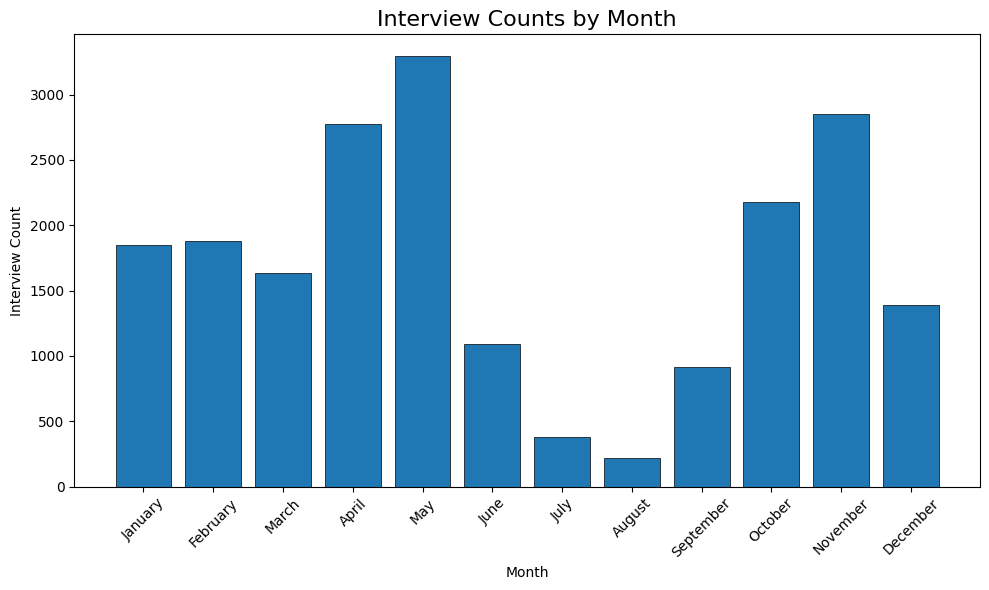

In [23]:
##BAR GRAPH##
# Assuming 'rankings_df' is the DataFrame containing the rankings
rankings_df = rankings_df.sort_values('Month')  # Sort the DataFrame by month

month_labels = rankings_df['Month'].astype(int)  # Convert month numbers to integers
interview_counts = rankings_df['Interview Count']

# Get the month names corresponding to the month numbers
month_names = [calendar.month_name[month_num] for month_num in month_labels]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(month_names, interview_counts, edgecolor='black', linewidth=0.5)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Interview Count')
plt.title('Interview Counts by Month', fontsize='16')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

/var/folders/vw/1sthm_ts1dj_1hqg1xnsz19w0000gn/T/ipykernel_22548/3113734159.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date_month'] = filtered_df['date_month'].astype(int)  # Convert month values to integers


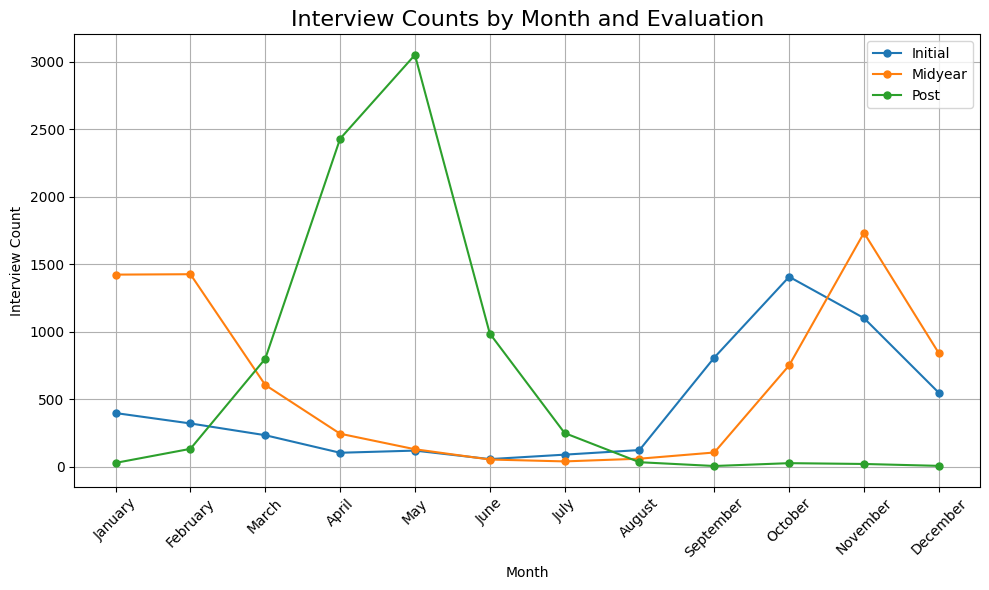

In [38]:
# Filter the DataFrame to include only desired evaluation categories
desired_categories = ['Initial', 'Midyear', 'Post']
filtered_df = df[df['evaluation'].isin(desired_categories)]

# Extract the month from the interview date
filtered_df['date_month'] = filtered_df['date_month'].astype(int)  # Convert month values to integers

# Calculate interview counts by month and evaluation category
month_evaluation_counts = filtered_df.groupby(['date_month', 'evaluation']).size().unstack().fillna(0)

# Plotting the line chart
plt.figure(figsize=(10, 6))

for category in month_evaluation_counts.columns:
    plt.plot(month_evaluation_counts.index, month_evaluation_counts[category], marker='o', markersize=5, label=category)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Interview Count')
plt.title('Interview Counts by Month and Evaluation', fontsize='16')
plt.legend()

# Customize x-axis tick labels with month names
month_labels = [calendar.month_name[month_num] for month_num in month_evaluation_counts.index]
plt.xticks(month_evaluation_counts.index, month_labels, rotation=45)

# Add gridlines
plt.grid(True)

# Display the chart
plt.tight_layout()
plt.show()

## Looking at full data set, national averages for each question - Identify potential national low levels, increase levels
- Overall average scores for each question on PG interview
- Identify highest and lowest ranked questions and areas within PG
- Ideal results would help us show national trends of challenges/excellence based on PG questions (both program/parent scores)

In [4]:
# For bullet 1:

# For bullet 2: see likert_analysis.ipynb, use likert heatmap

##consider using mean imputation or regression imputation to fill in missing variables.
##consider using the 'likert sum'
#use the likert package in R to analyze https://github.com/jbryer/likert

https://www.st-andrews.ac.uk/media/ceed/students/mathssupport/Likert.pdf
With Likert scale data we cannot use the mean as a measure of central tendency as it has no meaning i.e. what is the average of Stronly agree and disagree? The most appropriate measure of is the mode the most frequent responses, or the median. The best way to display the distribution of responses i.e. (% that agree, disagree etc) is to use a bar chart.

## Are seasoned Parent Gauge users showing higher averages in these areas?
- When breaking up PG users by age - are seasoned users consistently ranking higher in overall PG scores? Are there certain areas/questions where seasoned users are seeing higher responses?

In [1]:
##use quadratic regression to determine the peak in PG performance.

### Identify how many years to be considered a seasoned user if there is an increase in scores over time.
- When comparing PG users by age, is there an age where increases in scores level out?
- Ideal results would identify if there is an age we could say a program is seasoned and resulting changes in scores would not be from adopting PG

In [2]:
##use quadratic regression to determine the peak in PG performance.

### Any differences in overall averages when comparing programs by how many interview seasons occur?
- Breaking out interviews by season in which they occurred (Initial/Mid/Post) is there a likelihood in certain seasons having a marked difference in overall parent average scores (no program scores as Initial does not include)
- Is there a difference when comparing programs who conduct one interview season, two interview seasons, or three? Do any of them show a marked difference in overall parent scores

### Any differences in overall averages when comparing programs based on when interview seasons occur?
- When breaking out interview results by month, are there any trends identifying months where results are more likely to be higher/lower based on the month interview was conducted?
- Ideal results would tell us if there are influencing factors based on the time of year that would impact results

In [3]:
#You could also compare the scores by interview season with a t-test (for example compare the average of the initial vs the average of the post interview).

### Are there any trends coming up when reviewing programs with higher averages - Can we identify best practices?
- Reviewing the top 20 programs with numerous interviews that have been using PG for a period of time, are there any trends in when they’re conducting interview, how many interviews they’re conducting, and what kind of interviews they’re conducting and could we identify best practices out of those?
- For example, if all 20 programs are conducting two interview seasons, one in the month after school starting and one at the end of the year, we could reasonably use this as a best practice example to new users.